# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
#API Key from openweathermap
#api_key = api_keys.api_key

# starting url for weather Map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [12]:
#Create Empty Lists to oppend the API data into lists
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
# Start the call counter
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"---------------------------------------------------------------------------------------------------")

for city in cities:
    try:
        response = requests.get(f"{url}&q={city}").json()
        city_name.append(response["name"]) 
        cloudiness.append(response["clouds"]["all"]) 
        country.append(response["sys"]["country"]) 
        date.append(response["dt"]) 
        humidity.append(response["main"]["humidity"]) 
        max_temp.append(response["main"]["temp_max"]) 
        lat.append(response["coord"]["lat"]) 
        lng.append(response["coord"]["lon"]) 
        wind_speed.append(response["wind"]["speed"]) 
        city_record = response["name"]
        
        print(f"Processing Record {record} | {city_record}") 
        print(f"{url}&q={city}")
        # Increase counter by one
        
        record= record + 1
        # Wait a second in loop to not over exceed rate limit of API
        
        time.sleep(1.01)
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
---------------------------------------------------------------------------------------------------
Processing Record 1 | Faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5183241c74c75ecdc7e806120f87a6ed&q=faya
Processing Record 2 | La Ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5183241c74c75ecdc7e806120f87a6ed&q=la ronge
Processing Record 3 | Bend
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5183241c74c75ecdc7e806120f87a6ed&q=bend
Processing Record 4 | Dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5183241c74c75ecdc7e806120f87a6ed&q=dingle
City not found. Skipping...
Processing Record 5 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5183241c74c75ecdc7e806120f87a6ed&q=puerto ayora
Processing Record 6 | Cape Canaveral
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5183241c74c75ecdc7e806120f87a6ed&q=cape

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
 # Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity": humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}
# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)
# Display count of weather data values
weather_data.count()

City          543
Cloudiness    543
Country       543
Date          543
Humidity      543
Lat           543
Lng           543
Max Temp      543
Wind Speed    543
dtype: int64

In [18]:
# Save data frame to csv
weather_data.to_csv('weather_data.csv')

# Display data frame head
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Faya,3,SA,1571717952,37,18.39,42.45,60.80,5.50
1,La Ronge,90,CA,1571717953,86,55.10,-105.30,30.20,3.38
2,Bend,1,US,1571717954,71,44.06,-121.32,53.60,8.05
3,Dingle,15,PH,1571717956,75,11.00,122.67,84.94,6.40
4,Puerto Ayora,3,EC,1571717957,87,-0.74,-90.35,69.01,5.01


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

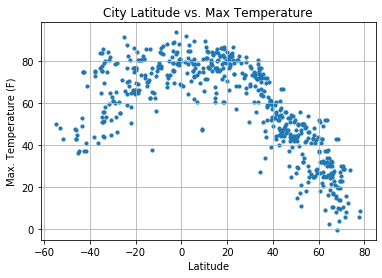

In [23]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature") 
plt.ylabel("Max. Temperature (F)") 
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

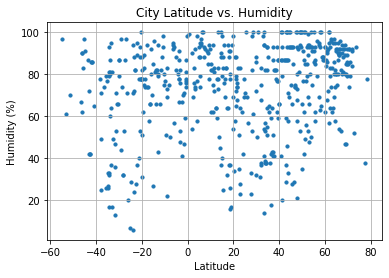

In [24]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity") 
plt.ylabel("Humidity (%)") 
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

In [ ]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)
# Incorporate the other graph properties

plt.title("City Latitude vs. Wind Speed") 
plt.ylabel("Wind Speed (mph)") 
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

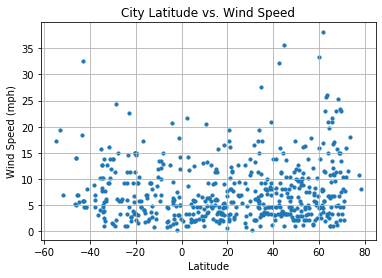

In [25]:

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed") 
plt.ylabel("Wind Speed (mph)") 
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()